In [1]:
import mglearn
import matplotlib.pyplot as plt

C:\Users\Seoul IT\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\Seoul IT\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
get_ipython().run_line_magic('matplotlib', 'inline')

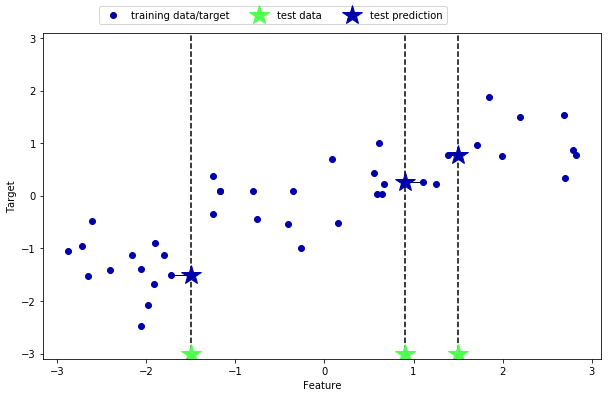

In [3]:
#예측

mglearn.plots.plot_knn_regression(n_neighbors=1)

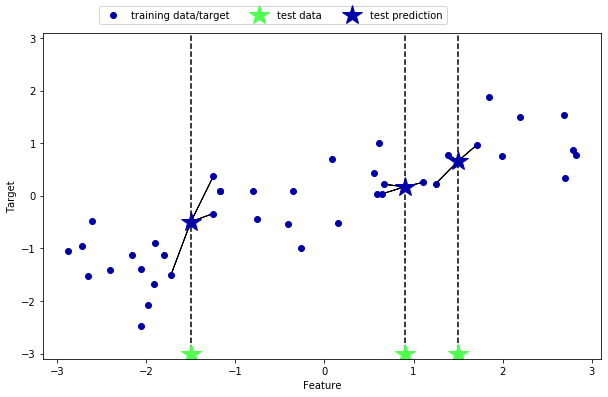

In [4]:
mglearn.plots.plot_knn_regression(n_neighbors=3) ### 3개면 3개의 평균을 가져온다

C:\Users\Seoul IT\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


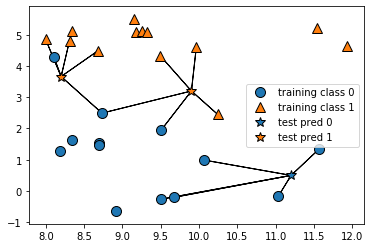

In [6]:
##분류

mglearn.plots.plot_knn_classification(n_neighbors=5)

C:\Users\Seoul IT\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


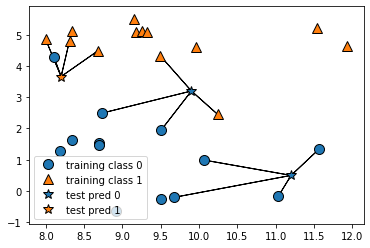

In [7]:
mglearn.plots.plot_knn_classification(n_neighbors=4) ## 개수가 동등하면 랜덤으로 판단하기때문에 knn개수 잡을때 홀수로 잡는것을 권장한다

In [13]:
from sklearn.datasets import load_breast_cancer
import matplotlib as plt

In [14]:
cancer = load_breast_cancer()
print("키 값은 {}".format(cancer.keys()))
print("행열의 값 : {}".format(cancer.data.shape))

키 값은 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
행열의 값 : (569, 30)


In [16]:
### 특성이름(feature_name)
print("클래스 이름(target_name) : {}".format(cancer['target_names']))
print()
print("특성의 이름(feature_names) : {}".format(cancer['feature_names']))
print()

클래스 이름(target_name) : ['malignant' 'benign']

특성의 이름(feature_names) : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']



In [21]:
from sklearn.model_selection import train_test_split

In [23]:
X = cancer.data
y = cancer.target
X_train , X_test, y_train, y_test = train_test_split(X,y,
                                                     stratify=cancer.target #층화추측
                                                     ,random_state=77)

In [27]:
### y_train, y_test 의 개수
### y_train안에 1과 0 의 각각의 개수
### y_test안에 1과 0 의 각각의 개수


print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

426
143
426
143


In [38]:
a=0
b=0
for i in range(0,426):
    if y_train[i] == 1:
        a+=1
    else:
        b+=1
print("1의 개수 : " , a)
print("0의 개수 :", b)

1의 개수 :  268
0의 개수 : 158


In [41]:
a=0
b=0
for i in range(0,143):
    if y_test[i] == 1:
        a+=1
    else:
        b+=1
print("1의 개수 : " , a)
print("0의 개수 :", b)

1의 개수 :  89
0의 개수 : 54


In [44]:
print(158/426*100)

37.08920187793427


In [46]:
print(268/426*100)

62.91079812206573


In [47]:
print(89/143*100)

62.23776223776224


In [48]:
print(54/143*100)

37.76223776223776


In [63]:
rate1 = (y_train_0/(y_train_0+y_test_0)*100) 
rate2 = (y_test_0/(y_test_0+y_train_0)*100)
print(rate1)
print(rate2)

74.52830188679245
25.471698113207548


In [59]:
X_train_0 = (X_train==0).sum() 
X_train_1 = (X_train==1).sum()
X_test_0 = (X_test==0).sum()
X_test_1 = (X_test==1).sum()

y_train_0 = (y_train==0).sum() 
y_train_1 = (y_train==1).sum()
y_test_0 = (y_test==0).sum()
y_test_1 = (y_test==1).sum()
print(y_train_0)
print(y_train_1)
print(y_test_1)
print(y_test_0)

158
268
89
54


In [61]:
rate1 = (y_train_1/(y_train_1+y_test_1)*100)
rate2 = (y_test_1/(y_train_1+y_test_1)*100)
print(rate1)
print(rate2)

75.07002801120449
24.92997198879552


In [97]:
### 모델 만들기
### 모델 학습 시키기
### 모델 이용한 예측
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

result_l = []
max = 0
max_k=0
result=0
for i in range(1,100):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    #print("테스트 세트 정확도: {:.2f}".format(model.score(X_test, y_test)))
    #result = model.score(X_test,y_test)
    result = (pred==y_test).sum()/len(pred)
    result_l.append(result)
    
    if max < result:
        max_k =i
        max=result

        
data2 = pd.DataFrame({'asdf':result_l}) ##딕셔너리 형태로 저장
data2.to_csv('result.csv',index=False)
print(max)
print(max_k)


0.958041958041958
7


In [ ]:
### 지도학습은 분류와 회귀로 나뉜다 분류는 이항분포, 다항분포로 나뉨